# Facial Expression Classification with FER2013

## Rodrigo Moraes (rdcmdev@gmail.com)

<img align="left" width="150" height="150" src="https://avatars1.githubusercontent.com/u/23252082?s=400&u=9a693e90761b50f89d7ae8a85b6f04f14400fd16&v=4">

# Type: Script

**Objective:** put all Confusion Matrix in a grid image.

**Basic Idea:** this script searchs recursively through **base_folder** looking for **png** images with **cm** in name. Than calculate best way to show this in a grid.

**Requisites:** 

1. This script must be inside path **pythonNotebooks**
2. Must exists a path in same level pythonNotebooks named **trained_models** with images
3. All Confusion Matrix images must have in name **cm**
4. All Confusion Matrix images must be of type **png**

In [1]:
import os

## List recursively all files in base_folder

In [2]:
base_folder = '../../trained_models/final/'
search_by_type = 'png'
filename_contains = ['cm']
filename_not_contains = ['checkpoint', 'oarriaga', 'cm_grid']

# check if str_to_check contains all subtrings in str_array
def check_if_contain_all_str(str_array,  str_to_check):    
    for str_on_array in str_array:
        # if not contains at least one substring answer is False
        if str_to_check.find(str_on_array) < 0: # NOT FOUND
            return False
    # if str_to_check contains all subtrings answer if True
    return True

# check if str_to_check NOT contains all subtrings in str_array
def check_if_NOT_contain_all_str(str_array,  str_to_check):    
    for str_on_array in str_array:
        # if contains at least one substring answer is False
        if str_to_check.find(str_on_array) >= 0: # NOT FOUND
            return False
    # if str_to_check NOT contains all subtrings answer if True
    return True
    
# contains filenames with relactive directories to file
dir_file_names = []
just_filename = []

for dirpath, dirname, filenames in os.walk(base_folder):
    for filename in filenames:        
        answer = check_if_contain_all_str(filename_contains, filename)
        if answer == True:
            answer = check_if_NOT_contain_all_str(filename_not_contains, filename)
            if answer == True:                                            
                dir_file_names.append(os.path.join(dirpath, filename))
                just_filename.append(filename)
                
dir_file_names.sort()

print("Founded files")
dir_file_names

Founded files


['../trained_models/final/cm_1.png',
 '../trained_models/final/cm_2.png',
 '../trained_models/final/cm_3.png',
 '../trained_models/final/cm_4.png',
 '../trained_models/final/cm_5.png',
 '../trained_models/final/cm_6.png',
 '../trained_models/final/cm_7.png',
 '../trained_models/final/cm_8.png',
 '../trained_models/final/cm_9.png']

## Read images files

In [3]:
from PIL import Image

In [4]:
cm_images = [Image.open(filename) for filename in dir_file_names]

In [5]:
size = cm_images[0].size
for image in cm_images:
    image.thumbnail(size, Image.ANTIALIAS)

## Calculate grid size

In [6]:
import math

cm_count = len(dir_file_names)
grid_rows = math.ceil( cm_count ** 0.5 )
grid_cols = math.floor( cm_count ** 0.5 )

grid_rows, grid_cols

(3, 3)

## Plot

In [7]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def get_blank_image(width, height=None, channels=3):
    if height == None:
        height = width
    data = np.ones((height, width, channels), dtype=np.uint8) * 255
    img = Image.fromarray(data, 'RGB')
    return img

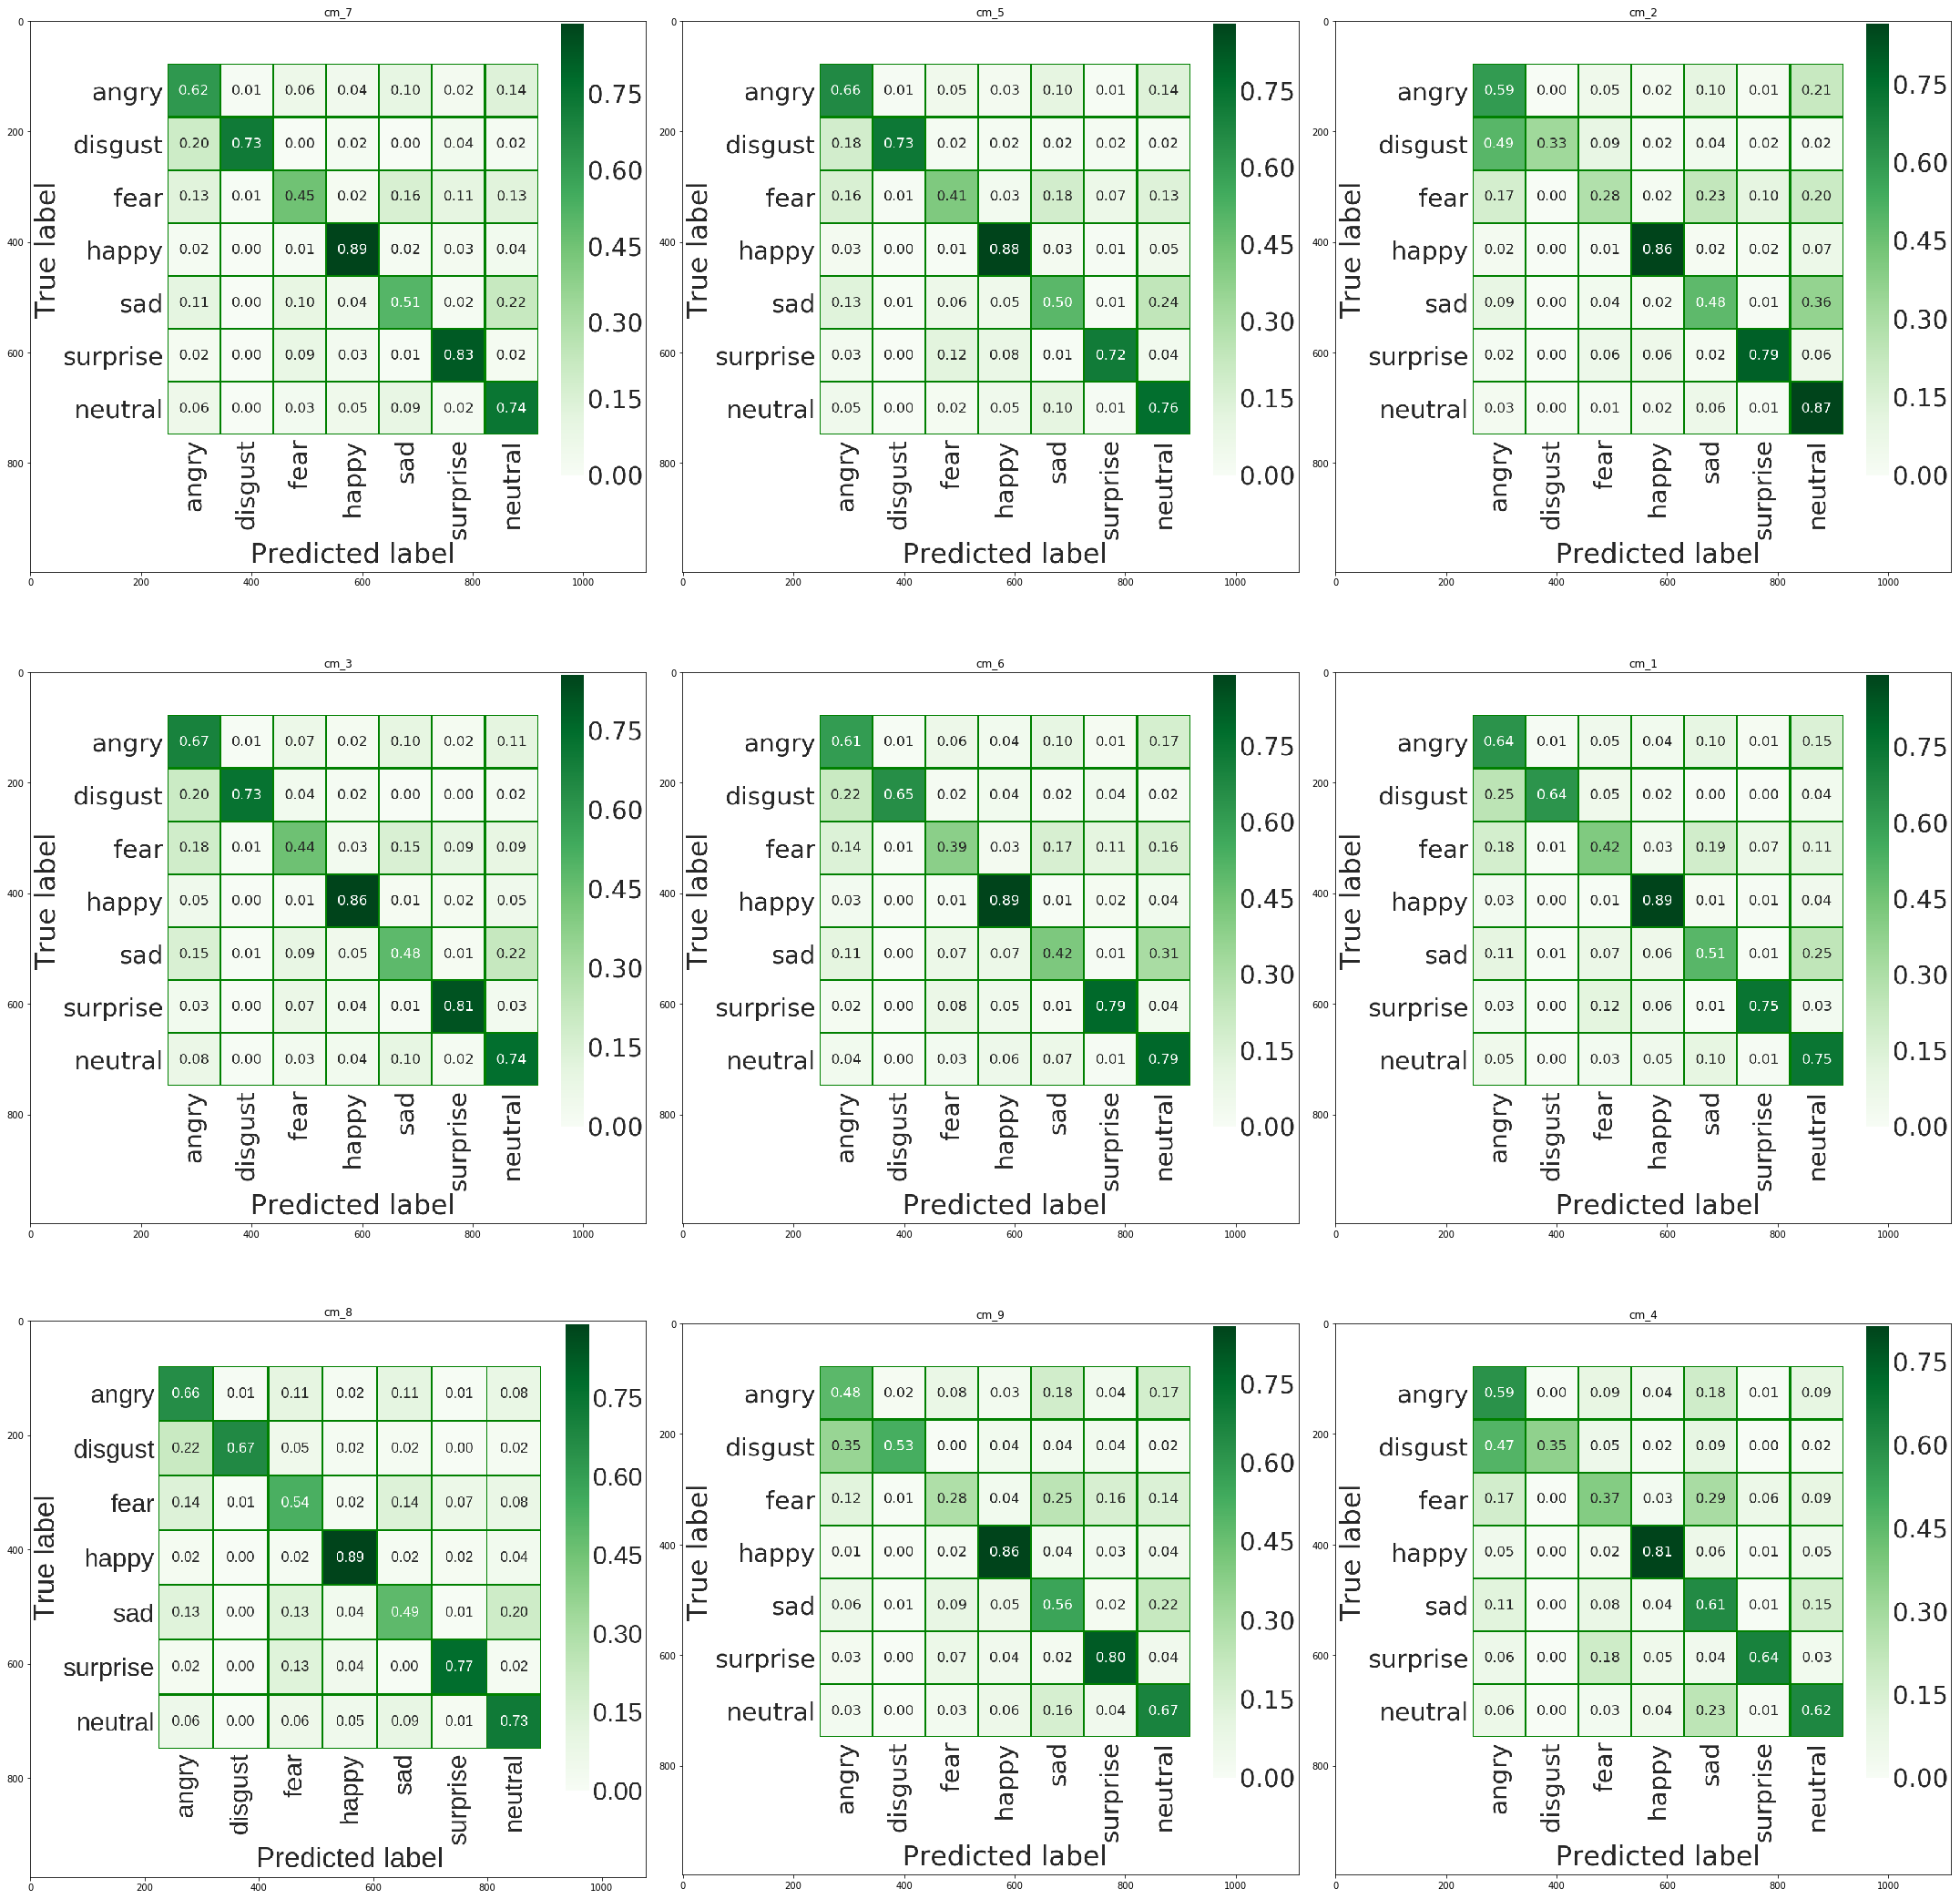

In [9]:
figure, axes = plt.subplots(grid_rows, grid_cols)
figure.set_figheight(30)
figure.set_figwidth(30)

width, height = cm_images[0].size
blank_image = get_blank_image(width, height)

k = 0
for i in range(grid_rows):
    for j in range(grid_cols):               
        if k < cm_count:
            axes[i, j].imshow(cm_images[k])
            axes[i, j].set_title(just_filename[k][:-4])        
            k += 1
        else:                
            axes[i, j].imshow(blank_image)  
plt.tight_layout()

In [10]:
figure.savefig("../../trained_models/cm_grid.png")